In [1]:
import sys
import cv2
import numpy as np
import keras
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical



In [2]:
# Load CIFAR-10 dataset
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [3]:
# Preprocess pixel values
def prep_pixels(train, test):
    train_norm = train.astype('float32') / 255.0
    test_norm = test.astype('float32') / 255.0
    return train_norm, test_norm

In [4]:
# Define CNN model from scratch
def define_scratch_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [5]:
# Define Transfer Learning model using VGG19
def define_transfer_model():


    return model

In [6]:
# Plot diagnostic learning curves
def summarize_diagnostics(history):
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')

    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

In [7]:
# Define the getBatch function
def getBatch(batch_size, x_data, y_data, train_or_val='train'):
    x_batch = []
    y_batch = []
    if train_or_val == 'train':
        idx = np.random.randint(0, len(x_data), (batch_size))

        for i in idx:
            img = cv2.resize(x_data[i], (224, 224), interpolation=cv2.INTER_CUBIC)
            x_batch.append(img)
            y_batch.append(y_data[i])
    elif train_or_val == 'val':
        idx = np.random.randint(0, len(x_data), (batch_size))

        for i in idx:
            img = cv2.resize(x_data[i], (224, 224), interpolation=cv2.INTER_CUBIC)
            x_batch.append(img)
            y_batch.append(y_data[i])
    else:
        print("error, please specify train or val")

    x_batch = np.array(x_batch)
    y_batch = np.array(y_batch)
    return x_batch, y_batch

In [8]:
# Run the test harness for CNN from scratch
def run_scratch_test_harness():
    trainX, trainY, testX, testY = load_dataset()
    trainX, testX = prep_pixels(trainX, testX)

    model = define_scratch_model()
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=2)

    _, acc = model.evaluate(testX, testY, verbose=0)
    print('CNN Model from Scratch:')
    print('> Accuracy: %.3f' % (acc * 100.0))

    summarize_diagnostics(history)

574710816/574710816 [==============================] - 4s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                     

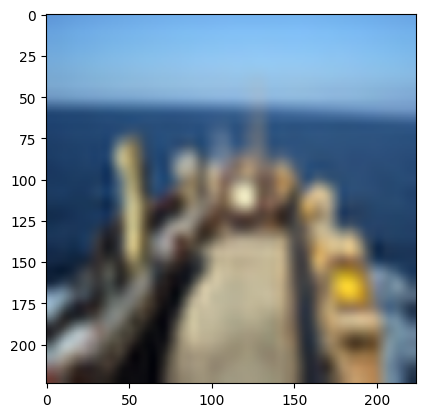

1/1 [==============================] - 1s 1s/step
pred: ship
acct: ship


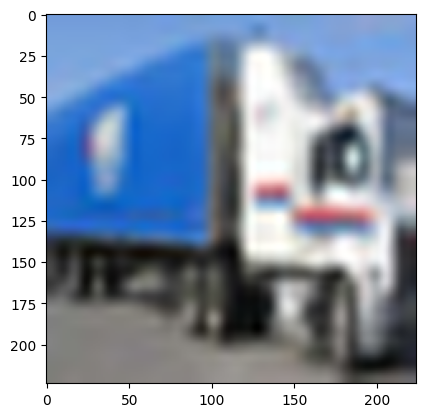

1/1 [==============================] - 0s 18ms/step
pred: truck
acct: truck


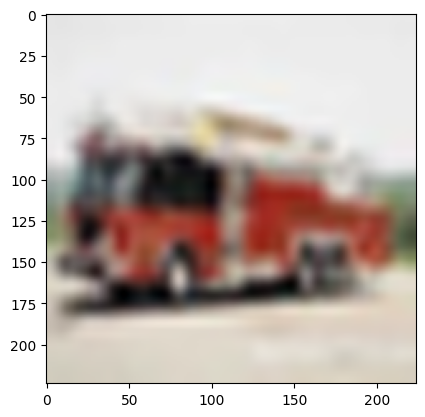

1/1 [==============================] - 0s 18ms/step
pred: truck
acct: truck


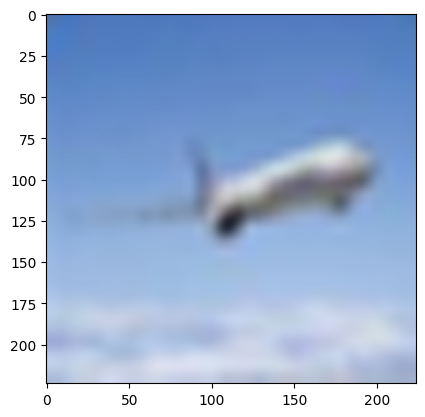

1/1 [==============================] - 0s 18ms/step
pred: airplane
acct: airplane


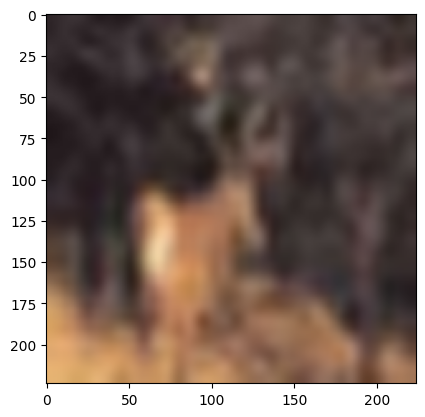

1/1 [==============================] - 0s 18ms/step
pred: deer
acct: deer


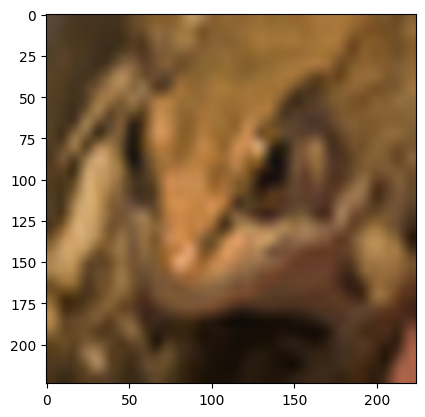

1/1 [==============================] - 0s 18ms/step
pred: frog
acct: frog


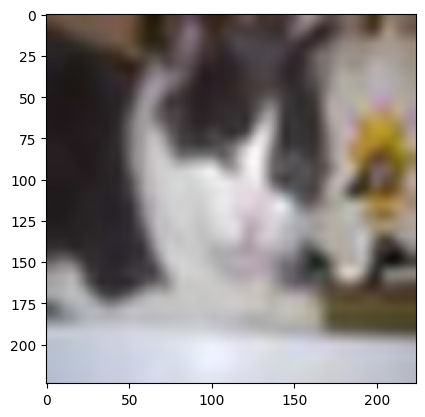

1/1 [==============================] - 0s 24ms/step
pred: dog
acct: cat


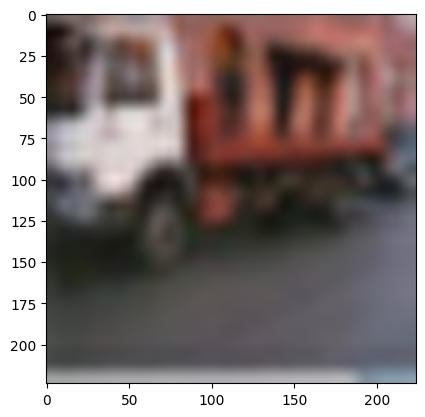

1/1 [==============================] - 0s 17ms/step
pred: truck
acct: truck


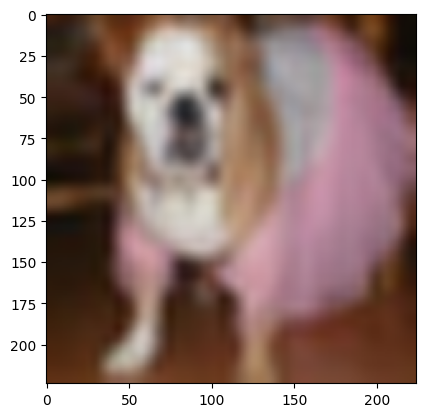

1/1 [==============================] - 0s 20ms/step
pred: dog
acct: dog


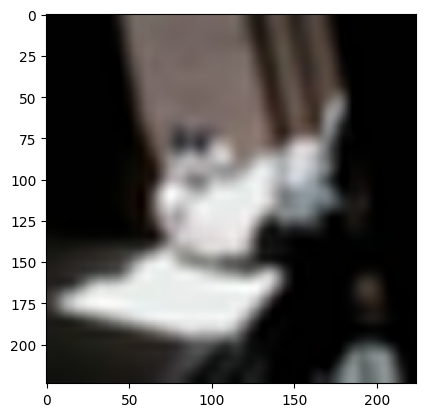

1/1 [==============================] - 0s 19ms/step
pred: cat
acct: cat


In [9]:
# Run the test harness for Transfer Learning using VGG19
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
x_train, x_val = prep_pixels(x_train, x_val)

vgg19_model = VGG19(include_top=True, weights='imagenet')
model = Sequential()
    # define new empty model
model = Sequential()

# add all layers except output from VGG19 to new model
for layer in vgg19_model.layers[:-1]:
  model.add(layer)

# freeze all weights
for layer in model.layers:
  layer.trainable = False

# add dropout layer and new output layer
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

# load dataset
(x_train, y_train) , (x_val, y_val) = cifar10.load_data()

NUM_CLASSES = 10

# Onehot encode labels

y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val, NUM_CLASSES)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

# returns batch_size random samples from either training set or validation set
# resizes each image to (224, 244, 3), the native input size for VGG19
def getBatch(batch_size, train_or_val='train'):
  x_batch = []
  y_batch = []
  if train_or_val == 'train':
    idx = np.random.randint(0, len(x_train), (batch_size))

    for i in idx:
      img = cv2.resize(x_train[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_train[i])
  elif train_or_val == 'val':
    idx = np.random.randint(0, len(x_val), (batch_size))

    for i in idx:
      img = cv2.resize(x_val[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_val[i])
  else:
    print("error, please specify train or val")

  x_batch = np.array(x_batch)
  y_batch = np.array(y_batch)
  return x_batch, y_batch

EPOCHS = 20
BATCH_SIZE = 250
VAL_SIZE = 500
STEPS = 50


for e in range(EPOCHS):
  train_loss = 0
  train_acc = 0

  for s in range(STEPS):
    x_batch, y_batch = getBatch(BATCH_SIZE, "train")
    out = model.train_on_batch(x_batch, y_batch)
    train_loss += out[0]
    train_acc += out[1]

  print(f"Epoch: {e}\nTraining Loss = {train_loss / STEPS}\tTraining Acc = {train_acc / STEPS}")

  x_v, y_v = getBatch(VAL_SIZE, "val")
  eval = model.evaluate(x_v, y_v)
  print(f"Validation loss: {eval[0]}\tValidation Acc: {eval[1]}\n")


  # Sample outputs from validation set
CATEGORIES = "airplane automobile bird cat deer dog frog horse ship truck".split(" ")

import matplotlib.pyplot as plt

x_v, y_v = getBatch(10, "val")

for i in range(10):

  import numpy as np
  plt.imshow(x_v[i])
  plt.show()
  print("pred: " +  CATEGORIES[np.argmax(model.predict(x_v[i:i+1]))])
  print("acct: " + CATEGORIES[np.argmax(y_v[i])])


In [10]:
# Entry point for CNN Model from Scratch
run_scratch_test_harness()

Epoch 1/100
782/782 - 6s - loss: 1.8492 - accuracy: 0.3454 - val_loss: 1.5894 - val_accuracy: 0.4377 - 6s/epoch - 7ms/step
Epoch 2/100
782/782 - 3s - loss: 1.4898 - accuracy: 0.4719 - val_loss: 1.3809 - val_accuracy: 0.5096 - 3s/epoch - 4ms/step
Epoch 3/100
782/782 - 3s - loss: 1.3222 - accuracy: 0.5337 - val_loss: 1.2693 - val_accuracy: 0.5478 - 3s/epoch - 4ms/step
Epoch 4/100
782/782 - 3s - loss: 1.2248 - accuracy: 0.5693 - val_loss: 1.1914 - val_accuracy: 0.5864 - 3s/epoch - 4ms/step
Epoch 5/100
782/782 - 3s - loss: 1.1525 - accuracy: 0.5974 - val_loss: 1.1445 - val_accuracy: 0.5995 - 3s/epoch - 4ms/step
Epoch 6/100
782/782 - 3s - loss: 1.0979 - accuracy: 0.6170 - val_loss: 1.1475 - val_accuracy: 0.6015 - 3s/epoch - 4ms/step
Epoch 7/100
782/782 - 3s - loss: 1.0504 - accuracy: 0.6342 - val_loss: 1.0779 - val_accuracy: 0.6254 - 3s/epoch - 4ms/step
Epoch 8/100
782/782 - 3s - loss: 1.0105 - accuracy: 0.6481 - val_loss: 1.1027 - val_accuracy: 0.6186 - 3s/epoch - 4ms/step
Epoch 9/100
782/

In [10]:
# Initialize empty lists to store training and validation loss
train_loss_history = []
val_loss_history = []

# Training loop
for e in range(EPOCHS):
    train_loss = 0
    train_acc = 0

    for s in range(STEPS):
        x_batch, y_batch = getBatch(BATCH_SIZE, "train")
        out = model.train_on_batch(x_batch, y_batch)
        train_loss += out[0]
        train_acc += out[1]

    # Calculate average training loss for the epoch
    avg_train_loss = train_loss / STEPS
    train_loss_history.append(avg_train_loss)

    # Validation set evaluation
    x_v, y_v = getBatch(VAL_SIZE, "val")
    eval = model.evaluate(x_v, y_v)
    val_loss = eval[0]
    val_loss_history.append(val_loss)

    print(f"Epoch: {e}\nTraining Loss = {avg_train_loss}\tValidation Loss = {val_loss}")

# Plotting training and validation loss
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plotting training and validation accuracy
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()